In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Logisticregression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("Diabetes_data.csv")
data
data.drop("smoking_history", axis=True)
data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NaN,80.0,0,1,never,25.19,6.6,140,0
1,NaN,54.0,0,0,No Info,27.32,6.6,80,0
2,NaN,28.0,0,0,never,27.32,5.7,158,0
3,NaN,36.0,0,0,current,23.45,5.0,155,0
4,NaN,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,NaN,80.0,0,0,No Info,27.32,6.2,90,0
99996,NaN,2.0,0,0,No Info,17.37,6.5,100,0
99997,NaN,66.0,0,0,former,27.83,5.7,155,0
99998,NaN,24.0,0,0,never,35.42,4.0,100,0


In [17]:
data['gender'].replace({'Male':1, 'Female':0}, inplace=True)
print(data)

       gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0         NaN  80.0             0              1  25.19          6.6   
1         NaN  54.0             0              0  27.32          6.6   
2         NaN  28.0             0              0  27.32          5.7   
3         NaN  36.0             0              0  23.45          5.0   
4         NaN  76.0             1              1  20.14          4.8   
...       ...   ...           ...            ...    ...          ...   
99995     NaN  80.0             0              0  27.32          6.2   
99996     NaN   2.0             0              0  17.37          6.5   
99997     NaN  66.0             0              0  27.83          5.7   
99998     NaN  24.0             0              0  35.42          4.0   
99999     NaN  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  
0                      140         0  
1                       80         0  
2                 

In [4]:
data.drop("smoking_history", axis=1)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NaN,80.0,0,1,never,25.19,6.6,140,0
1,NaN,54.0,0,0,No Info,27.32,6.6,80,0
2,NaN,28.0,0,0,never,27.32,5.7,158,0
3,NaN,36.0,0,0,current,23.45,5.0,155,0
4,NaN,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,NaN,80.0,0,0,No Info,27.32,6.2,90,0
99996,NaN,2.0,0,0,No Info,17.37,6.5,100,0
99997,NaN,66.0,0,0,former,27.83,5.7,155,0
99998,NaN,24.0,0,0,never,35.42,4.0,100,0


In [5]:
data['hypertension'].value_counts()


0    92515
1     7485
Name: hypertension, dtype: int64

In [6]:
data['diabetes'].value_counts()


0    91500
1     8500
Name: diabetes, dtype: int64

In [7]:
data['smoking_history'].unique()



array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
data.groupby('diabetes').mean()


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,
0,NaN,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,NaN,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


<AxesSubplot:>

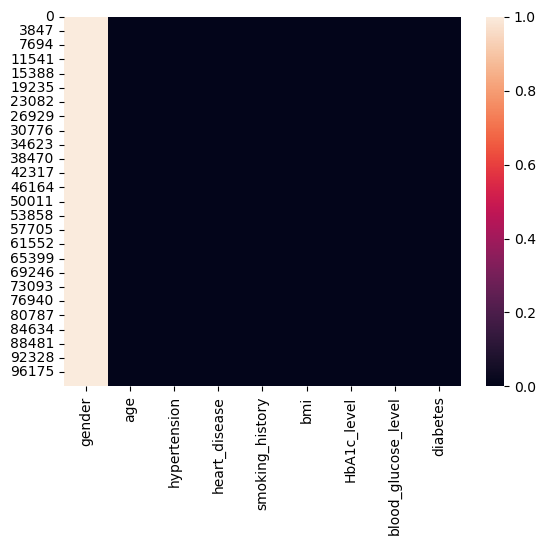

In [9]:
sns.heatmap(data.isnull()) #as graph is blank means there is no null values


In [10]:
data.drop("smoking_history" ,axis=1,inplace=True)

In [11]:
correlation=data.corr
print(correlation)

<bound method DataFrame.corr of        gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0         NaN  80.0             0              1  25.19          6.6   
1         NaN  54.0             0              0  27.32          6.6   
2         NaN  28.0             0              0  27.32          5.7   
3         NaN  36.0             0              0  23.45          5.0   
4         NaN  76.0             1              1  20.14          4.8   
...       ...   ...           ...            ...    ...          ...   
99995     NaN  80.0             0              0  27.32          6.2   
99996     NaN   2.0             0              0  17.37          6.5   
99997     NaN  66.0             0              0  27.83          5.7   
99998     NaN  24.0             0              0  35.42          4.0   
99999     NaN  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  
0                      140         0  
1                       8

In [12]:
data['gender'] = pd.to_numeric(data['gender'], errors='coerce')

In [13]:
from sklearn.model_selection import train_test_split
y=data["diabetes"]
x=data.drop("diabetes",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)#randam_state will tale values upto 35
x_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
73176,NaN,55.0,0,0,44.55,6.6,160
13161,NaN,16.0,0,0,23.92,6.1,200
81417,NaN,72.0,0,1,25.73,6.6,100
33913,NaN,21.0,0,0,22.86,5.7,90
51454,NaN,62.0,1,0,25.18,3.5,90
...,...,...,...,...,...,...,...
48056,NaN,78.0,0,0,23.11,6.1,130
59011,NaN,80.0,1,0,24.87,5.7,90
77049,NaN,62.0,0,0,37.87,6.6,90
67224,NaN,24.0,0,0,30.79,6.0,145


In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [15]:
lr.fit(x_train,y_train)
y_prediction=lr.predict(x_test)
for i,j in zip(y_prediction,y_test):
    print(i,"-->",j)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               0 non-null       float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.1 MB
